In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
import os

In [46]:
!pwd

/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_04_Astropy_and_Fits/data/data/data


In [47]:
!ls
!mkdir data

1337.2761 1091.3668


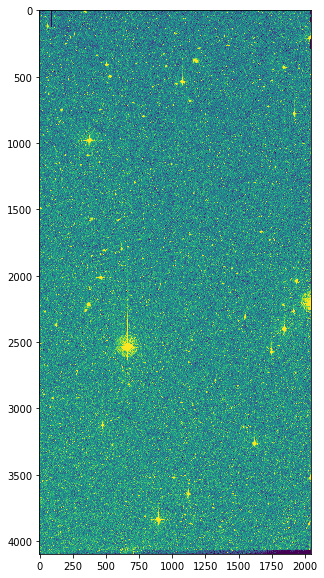

In [48]:
dir_ = '/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_04_Astropy_and_Fits/data/'
imageName = dir_+ 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'
f = fits.open(imageName)
data = f[0].data  #This is the image array
header = f[0].header

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

print(mean, sigma)

#plot the image with some reasonable scale
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma)
plt.show()

In [50]:
header['DATE-OBS']
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


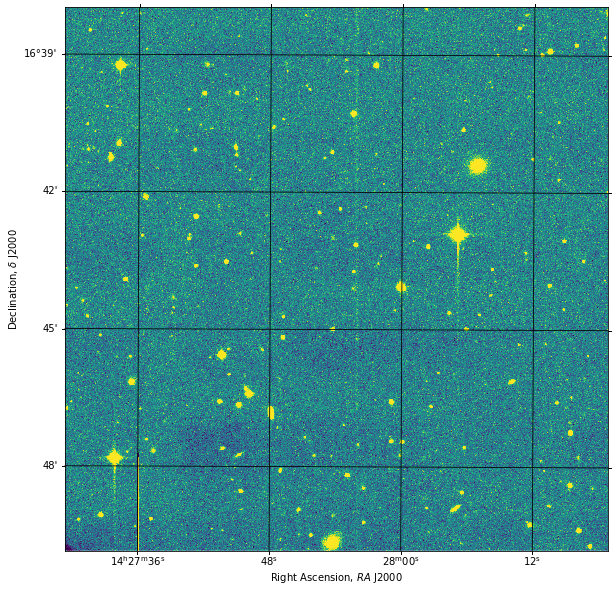

In [54]:
dir_ = '/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_04_Astropy_and_Fits/data/'
filename = dir_+ 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'
f = fits.open(imageName)
data = f[0].data  #This is the image array
header = f[0].header
hdu = f[0]

w = wcs.WCS(hdu.header)

#PLOT SETUP
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=w)
# ax.set_autoscale_on(True)
fig.set_size_inches(10,10)
# fig.set_size_inches(4,4)

width_pix = 705
height_pix = 705
ax.set_xlim(0,width_pix);
ax.set_ylim(0,height_pix);
# ax.invert_yaxis()
# ax.invert_xaxis()
# ax.set_title('DIS Observations Slit and SN Locations, RA vs. DEC')
ax.set_xlabel('Right Ascension, $RA$ J2000')
ax.set_ylabel('Declination, $\delta$ J2000')
ax.grid(color='black')

ax.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma);

In [59]:
def radial_profile(data, center):
    x, y = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [73]:
np.argmax(data)

3417737

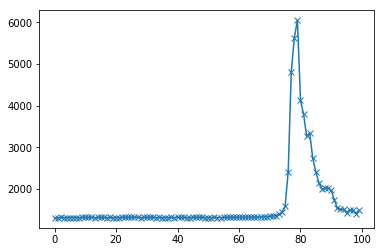

In [64]:
rad_profile = radial_profile(data, center=[1000,300])
plt.plot(rad_profile[0:100], 'x-')

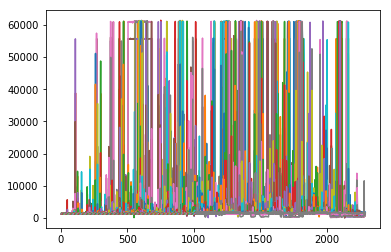

In [58]:
y, x = np.indices(data.shape)

center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

r = np.hypot(x - center[0], y - center[1])

plt.plot(r, data);